In [144]:
# https://www.clever-tanken.de/statistik/historie/super-e10

In [145]:
import pandas as pd
import datetime
import numpy as np
from matplotlib import pyplot as plt

In [146]:
# df = pd.read_excel("E10.xlsx")
# i=df['Date']
# df['Date']=pd.Series(i)
# df['Date']=df['Date'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000).strftime('%Y-%m-%d %H:%M:%S'))
# df


In [147]:
# df.to_excel("output.xlsx")

In [148]:
df1 = pd.read_excel("input.xlsx")
df1['Date'] = pd.to_datetime(df1.Date)
df1.head(3)

,Date,E10,Rohöl_USD,EUR_USD
0,2021-06-17,1.498,71.035,1.19575
1,2021-06-18,1.501,71.165,1.18890
2,2021-06-19,1.505,NaN,NaN


In [154]:
df1["USD_EUR"] = 1 / df1["EUR_USD"]
df1["USD_EUR_normiert"] = df1["USD_EUR"] * (100/0.836295)

df1["Rohöl_USD_normiert"] = df1["Rohöl_USD"]  * (100/71.035)
df1["Rohöl_USD_normiert"] = df1["Rohöl_USD_normiert"].interpolate()

df1["E10_normiert"] = df1["E10"] * (100/1.498)

df1["Öl x EUR_USD"] = df1['Rohöl_USD'] * df1['USD_EUR']
df1["Öl x EUR_USD_normiert"] = df1["Öl x EUR_USD"] * (100/59.406230)
df1["Öl x EUR_USD_normiert"] = df1["Öl x EUR_USD_normiert"].interpolate()


df1["Rohöl_USD_normiert"] = df1["Rohöl_USD_normiert"].rolling(window=15, min_periods=1, center=True).mean()
df1["E10_normiert"] = df1["E10_normiert"].rolling(window=15, min_periods=1, center=True).mean()
df1["Öl x EUR_USD_normiert"] = df1["Öl x EUR_USD_normiert"].rolling(window=15, min_periods=1, center=True).mean()

df1

,Date,E10,Rohöl_USD,EUR_USD,USD_EUR,USD_EUR_normiert,Rohöl_USD_normiert,E10_normiert,Öl x EUR_USD,Öl x EUR_USD_normiert
0,2021-06-17,1.498,71.035,1.19575,0.836295,100.000025,101.784332,100.584112,59.406230,102.182996
1,2021-06-18,1.501,71.165,1.18890,0.841114,100.576188,101.973988,100.697226,59.857852,102.334610
2,2021-06-19,1.505,NaN,NaN,NaN,NaN,102.126651,100.827770,NaN,102.464223
3,2021-06-20,1.512,NaN,NaN,NaN,NaN,102.252411,100.964923,NaN,102.577835
4,2021-06-21,1.507,72.555,1.18850,0.841397,100.610038,102.357993,101.062528,61.047539,102.679446
...,...,...,...,...,...,...,...,...,...,...
361,2022-06-13,1.950,119.860,1.04585,0.956160,114.332868,167.513080,129.695149,114.605345,189.661603
362,2022-06-14,1.942,120.150,1.04400,0.957854,114.535470,167.472501,129.694138,115.086207,189.871096
363,2022-06-15,1.938,117.105,1.04465,0.957258,114.464204,167.502640,129.659546,112.099746,190.143211
364,2022-06-16,1.933,115.195,1.04565,0.956343,114.354737,167.149996,129.624685,110.165926,190.098245


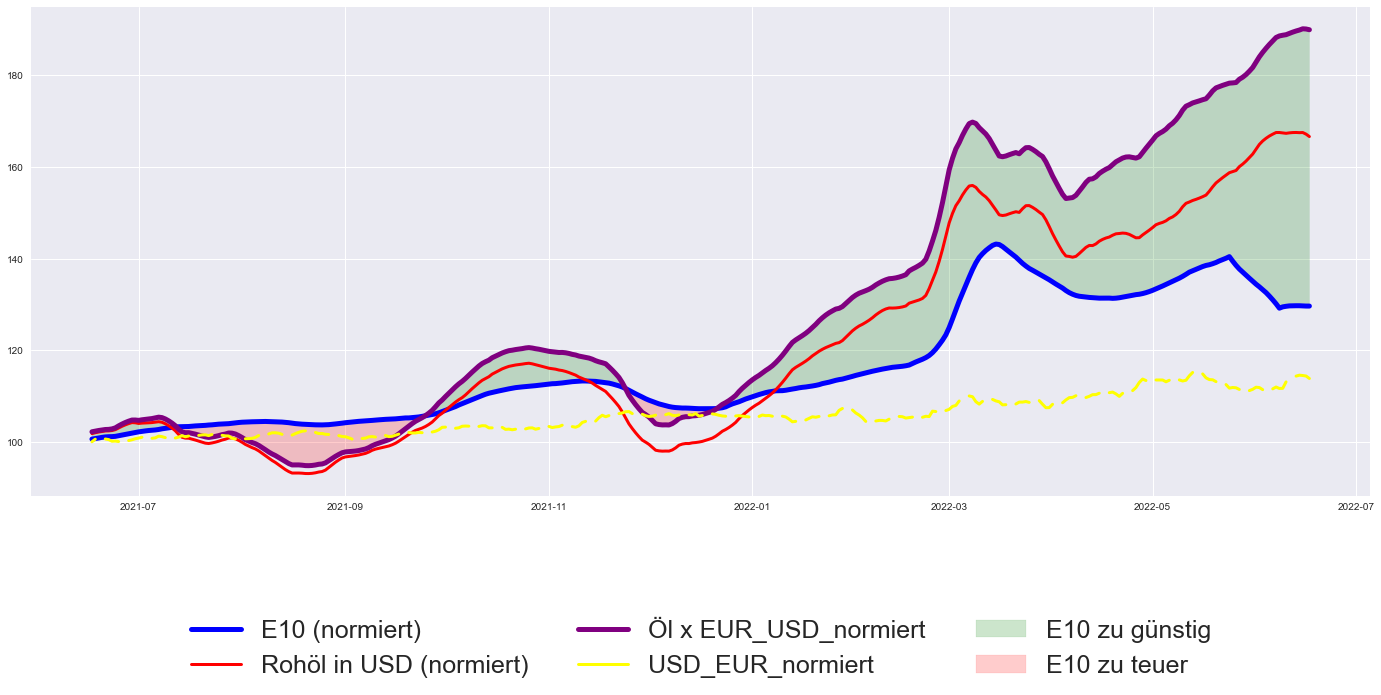

In [162]:
plt.figure(figsize=(24,9))
plt.style.use('seaborn')
plt.grid(True)

# Kurzzeittrend
plt.plot(df1["Date"], df1["E10_normiert"], marker='', linestyle='-', alpha = 1,
    color="blue", linewidth=5, label = f'E10 (normiert)', markersize=10)

plt.plot(df1["Date"], df1["Rohöl_USD_normiert"], marker='', linestyle='-', alpha = 1,
    color="red", linewidth=3, label = f'Rohöl in USD (normiert)', markersize=10)

plt.plot(df1["Date"], df1["Öl x EUR_USD_normiert"], marker='', linestyle='-', alpha = 1,
    color="purple", linewidth=5, label = f'Öl x EUR_USD_normiert', markersize=10)

plt.plot(df1["Date"], df1["USD_EUR_normiert"], marker='', linestyle='-', alpha = 1,
    color="yellow", linewidth=3, label = f'USD_EUR_normiert', markersize=10)



plt.fill_between(df1["Date"], df1["Öl x EUR_USD_normiert"], df1["E10_normiert"], color='green', alpha=0.2,
    label=f'E10 zu günstig', interpolate=True, where = df1["Öl x EUR_USD_normiert"] > df1["E10_normiert"])

plt.fill_between(df1["Date"], df1["Öl x EUR_USD_normiert"], df1["E10_normiert"], color='red', alpha=0.2,
    label=f'E10 zu teuer', interpolate=True, where = df1["Öl x EUR_USD_normiert"] <= df1["E10_normiert"])


plt.legend(loc='upper center',
    bbox_to_anchor=(0.5, -0.2),
    fancybox=True,
    shadow=True,
    ncol=3,
    fontsize=25)


plt.savefig(f'Benzinpreise.png', dpi=300, bbox_inches='tight')
